<a href="https://colab.research.google.com/github/Nur9702/drinks_klassifikate/blob/main/NSandNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.5.3

INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<1.11,>=1.7.0 (from fastai) (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch<1.11,>=1.7.0


#kutubhonalarni tekshirib olamiz


In [1]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.5.1+cu124
2.7.18


In [2]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)
#path.ls()

#label getter funktsiyasi
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

#dataloader
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func=label_getter,
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))

#fine tunning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 177MB/s]


epoch,train_loss,valid_loss,time
0,2.950890,4.119115,00:03


epoch,train_loss,valid_loss,time
0,2.453992,2.016117,00:01
1,2.028837,1.517366,00:01
2,1.754956,1.192163,00:01
3,1.552632,1.017915,00:01
4,1.378305,0.907891,00:01
5,1.236203,0.840557,00:01
6,1.109464,0.767322,00:01
7,1.001396,0.727836,00:01
8,0.910910,0.717881,00:01
9,0.835236,0.692766,00:01


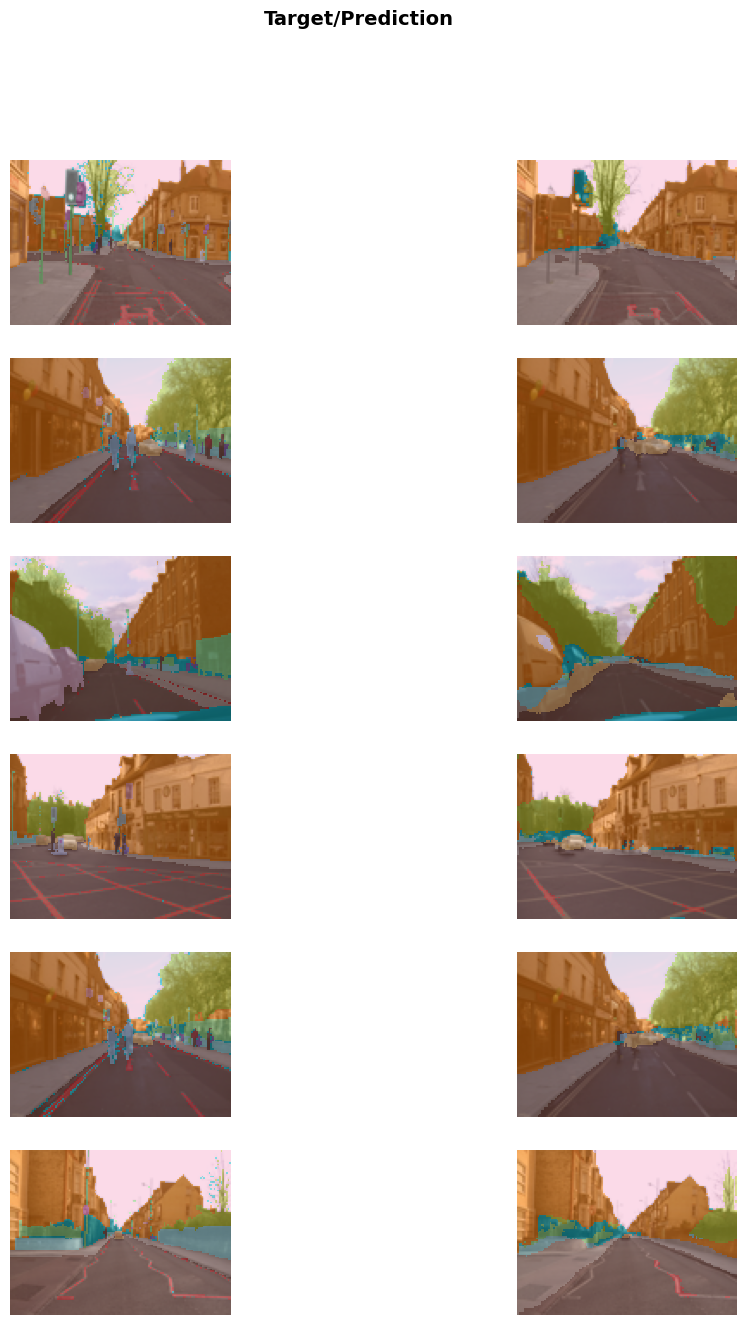

In [3]:
learn.show_results(max_n=6, figsize=(12, 15))

#NLP Natural Language Proccessing

IMDb Reviev dataset


In [4]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.5.1+cu124
2.7.18


In [5]:
from fastai.text.all import *

#dataset
path = untar_data(URLs.IMDB)
#path.ls()

#dataloader
dls = TextDataLoaders.from_folder(path, train='train', valid='test')

#fine tune
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 0.01)

/usr/local/lib/python3.11/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,time
0,0.465127,0.395597,0.822880,03:22


epoch,train_loss,valid_loss,accuracy,time
0,0.292686,0.342023,0.865760,07:01
1,0.231110,0.261295,0.893160,07:01
2,0.185307,0.191625,0.928600,07:02
3,0.152539,0.195010,0.927840,07:01


In [8]:
learn.predict('I hate that movie')

('neg', tensor(0), tensor([0.5488, 0.4512]))